# Task A: PCA of colored faces


In [24]:
import skimage
from skimage import io
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
DIR_MAC= '/Users/haipengwu/Codings/Machine Learning/HW7/'
DIR_1080="C:\\Users\\WIN10\\Codings\\Machine Learning\\HW7\\"

DIR = DIR_MAC
FACE_DIR= DIR+ "Aberdeen"


img_dir = os.listdir(FACE_DIR)


In [3]:
faces_data = []

for img in img_dir:
    try:
        img_array = io.imread(os.path.join(FACE_DIR , img), plugin='matplotlib')
        faces_data.append(img_array.flatten()) #flatten (415,600,600,3) tensor to (415,1080000) tensor
    except Exception as e:
            pass

faces_data= np.array(faces_data)
print(faces_data.shape)

(415, 1080000)


![title](process.png)

In [4]:
def process(M): 
    M -= np.min(M)
    M /= np.max(M)
    M = (M * 255).astype(np.uint8)
    return M

## 1. reconstruct function: input is the images data matrices flattened, shape (415,1080000); i means the first i most important eigenvectors to use; 
## 2. decompose the (X - X_mean) using SVD, get U, sigma and V matrix;
## 3. calculate U[:,:i] * np.diag(sigma[:i] * V [:i,:] to get the approximated (X' - X_mean)
## 4. get X' from  (X' - X_mean)

![title](SVD.png)

In [61]:
def reconstruct(matrice, i): 
        
    mean = np.mean(matrice,axis = 0)
    training = matrice - mean
#     training = np.transpose(training)
    
    u,sigma,v = np.linalg.svd(training,full_matrices = False, 
                              compute_uv = True)
    reconstimgs = np.dot(np.matrix(u[:, :i]) ,np.dot(np.diag(sigma[:i]) , np.matrix(v[:i, :])))
#     reconstimgs = np.transpose(reconstimgs)
    reconstimgs = reconstimgs + mean 
    reconstimgs = np.array(reconstimgs).reshape(matrice.shape[0],np.int(np.sqrt(matrice.shape[1]/3)),np.int(np.sqrt(matrice.shape[1]/3)),3)
    
    print(u.shape, sigma.shape,v.shape)
    print(np.diag(sigma).shape)
    return reconstimgs

In [62]:
test_imgs = reconstruct(faces_data,5) 

(415, 415) (415,) (415, 1080000)
(415, 415)


## Display the image

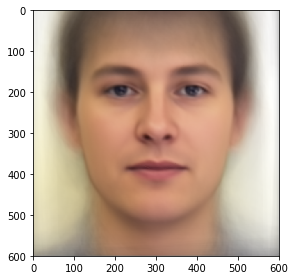

In [63]:
io.imshow(process(test_imgs[0]))## if process func is not applied, the image cannot be correctly displayed..

## try with some anime pics

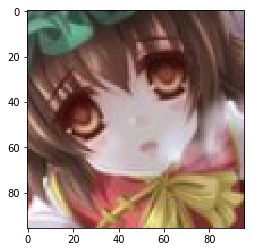

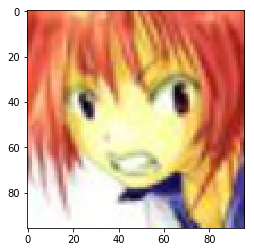

In [25]:
pickle_in = open("/Users/haipengwu/Codings/gan/animefacedata.pickle","rb")
training_data = pickle.load(pickle_in)
IMG_SIZE=96

data =np.array(training_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)
for img in data:
    plt.imshow(img)
    plt.show()
    break
plt.imshow(data[1])
plt.show()

In [48]:
anime_training = data[:4000,:,:,:]
anime_training = anime_training.reshape(-1,96*96*3)

In [55]:
anime_test_imgs = reconstruct(anime_training,200) 

(27648, 4000) (4000,) (4000, 4000)
(4000, 4000)


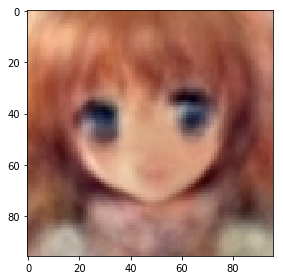

In [60]:
io.imshow(process(anime_test_imgs[500]))

# Conclusion: 如果是做图片的非监督学习，用SVD的话，图片需要“对齐”，也就是一个图片flatten以后每一个dimension的feature需要对齐，不对齐的地方实际效果会比较模糊。